In [1]:
import numpy as np
import random
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
def visualize(f, samples, elite_idx, i, x_range=(-6,6), y_range=(-6,6)):
    Xs = np.linspace(*x_range, 100)
    Ys = np.linspace(*y_range, 100)

    Xs, Ys = np.meshgrid(Xs, Ys)
    Zs = np.apply_along_axis(f, 2, np.stack([Xs, Ys], axis=2))

    # Plot countour
    plt.figure(figsize=(6, 6))
    plt.contourf(Xs, Ys, Zs)

    # Plot 
    sns.scatterplot(x=samples[:,0], y=samples[:,1])
    sns.scatterplot(x=samples[elite_idx,0], y=samples[elite_idx,1], color='red')

    #save pic
    plt.savefig(str(i) + ".png");
    
    plt.show()

In [3]:
def cross_entropy_method(f, mu, sigma, k_max, m=40, m_elite=10):
    for k in range(k_max):
        samples = np.random.multivariate_normal(mu, sigma, m)
        order = np.array([f(samples[i]) for i in range(m)])
        elite_idx = order.argsort()[:m_elite]
        visualize(f,samples, elite_idx, k+1)
        
        mu = np.mean(samples[elite_idx], axis=0)
        sigma = np.cov(samples[elite_idx], rowvar=0)
        
    return mu, sigma

In [4]:
def branin(x, a=1, b=5.1/(4*(np.pi**2)), c=5/np.pi, r=6, s=10, t=1/(8*np.pi)):
    return a*(x[1]-b*(x[0]**2)+c*x[0]-r)**2 + s*(1-t)*np.cos(x[0]) + s

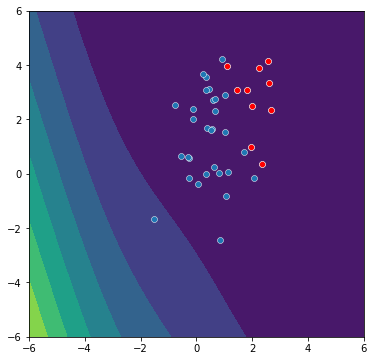

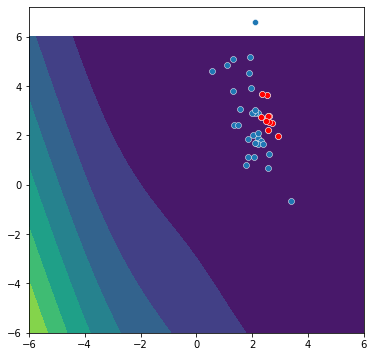

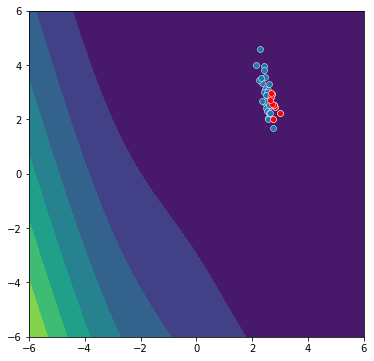

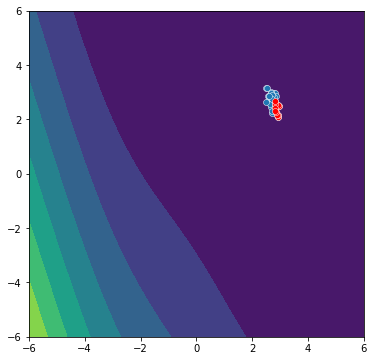

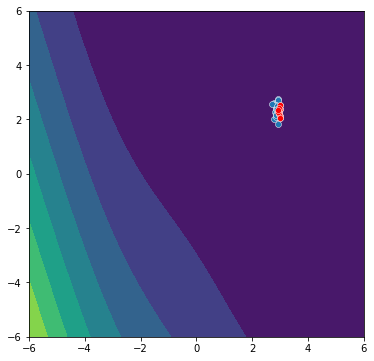

In [5]:
random.seed(10)
mu = [0.5, 1.5]
sigma = [[1.0, 0.2],[0.2, 2.0]]
k_max = 5
new_mu, new_sigma = cross_entropy_method(branin,mu,sigma,k_max)